In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cardio_train.csv', delimiter=';')
df.head()  # Display the first few rows to inspect the dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
df['age'] = df['age'] // 365

In [3]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
df = df[(df['ap_hi'] >= 90) & (df['ap_hi'] <= 180) & (df['ap_lo'] >= 60) & (df['ap_lo'] <= 120)]

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] = scaler.fit_transform(df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])

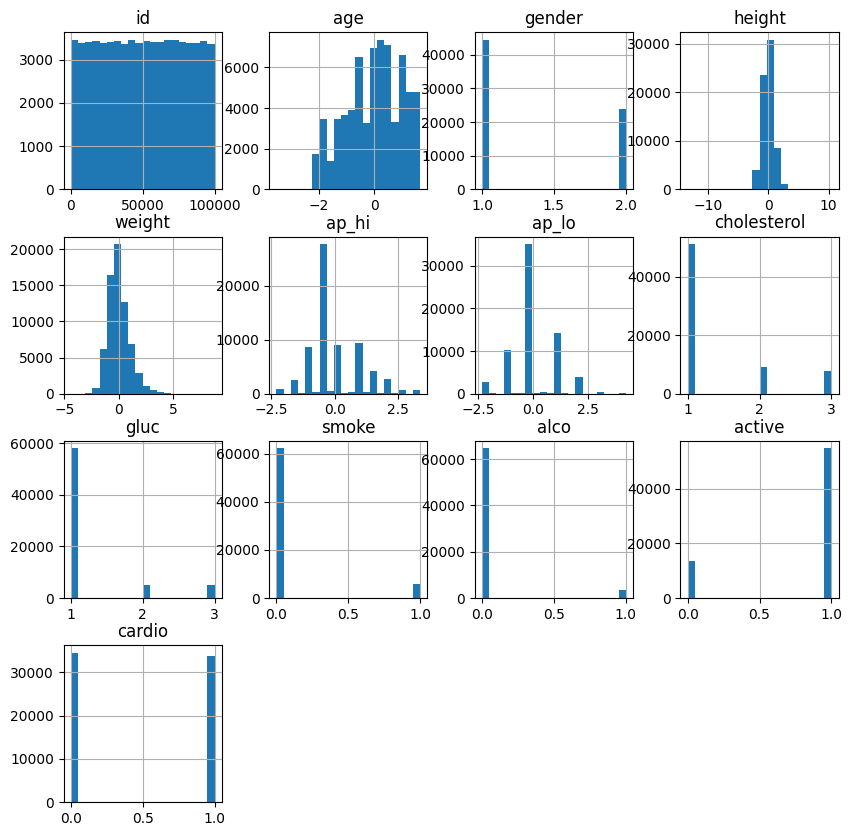

In [6]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(10, 10))
plt.show()


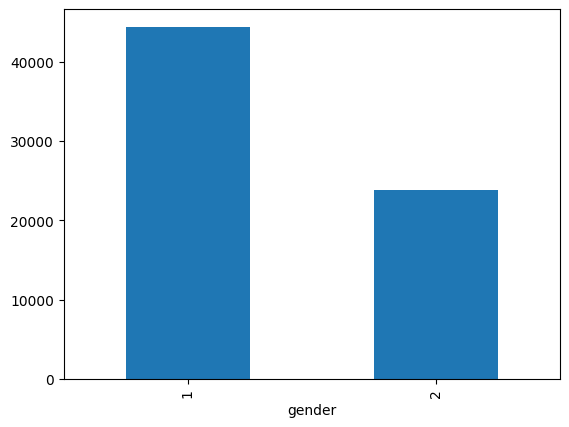

In [7]:
df['gender'].value_counts().plot(kind='bar')
plt.show()


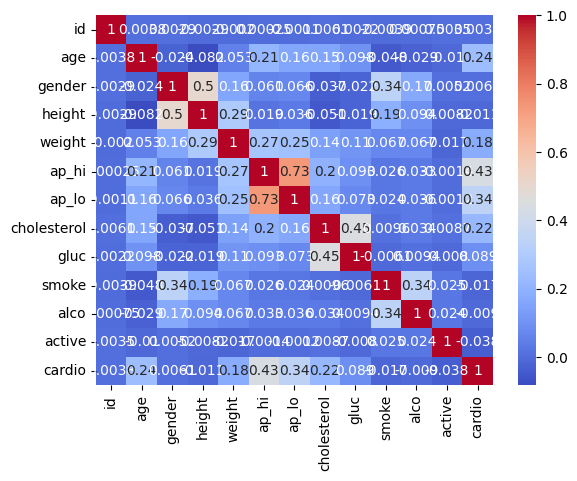

In [8]:
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


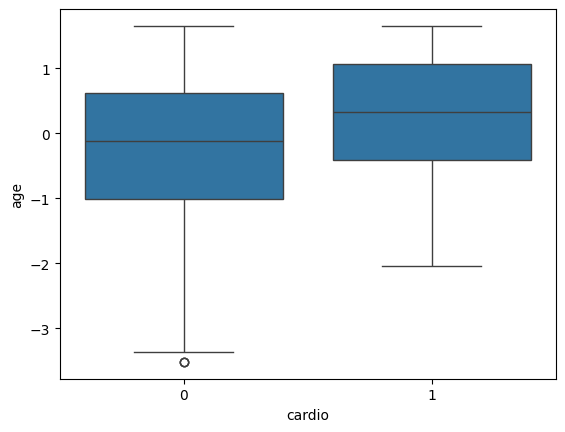

In [9]:
sns.boxplot(x='cardio', y='age', data=df)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['cardio'])  # Features (excluding the target)
y = df['cardio']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model on scaled data
model = LogisticRegression(max_iter=500)  # Set max_iter if necessary
model.fit(X_train_scaled, y_train)
accuracy = model.score(X_test_scaled, y_test)
print(f'Logistic Regression Accuracy with Scaled Data: {accuracy}')



Logistic Regression Accuracy with Scaled Data: 0.7249468514038561


In [12]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'SVM Accuracy: {accuracy}')


SVM Accuracy: 0.510373139799135


In [13]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'KNN Accuracy: {accuracy}')


KNN Accuracy: 0.5235686533245363


In [14]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'Decision Tree Accuracy: {accuracy}')


Decision Tree Accuracy: 0.6373433032768858


In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'Random Forest Accuracy: {accuracy}')


Random Forest Accuracy: 0.716516384429294


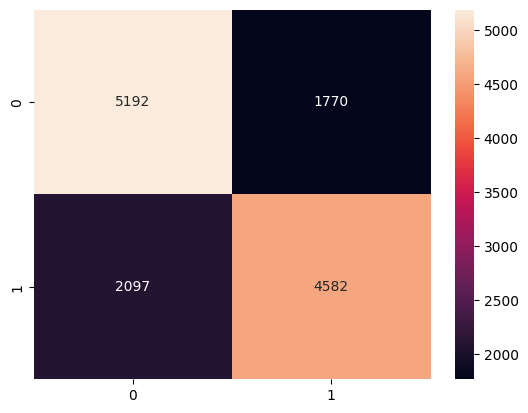

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6962
           1       0.72      0.69      0.70      6679

    accuracy                           0.72     13641
   macro avg       0.72      0.72      0.72     13641
weighted avg       0.72      0.72      0.72     13641



In [18]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X and y are defined properly before this point

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, logreg_pred)

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Create a dictionary of models and their accuracies
model_performance = {
    'Logistic Regression': logreg_acc,
    'SVM': svm_acc,
    'KNN': knn_acc,
    'Decision Tree': dt_acc,
    'Random Forest': rf_acc
}

# Find the best-performing model
best_model = max(model_performance, key=model_performance.get)

# Display the results
print("Model Performance:")
for model, acc in model_performance.items():
    print(f'{model}: {acc:.4f}')

print(f'\nBest Performing Model: {best_model} with accuracy {model_performance[best_model]:.4f}')


Model Performance:
Logistic Regression: 0.7249
SVM: 0.7304
KNN: 0.6899
Decision Tree: 0.6364
Random Forest: 0.7169

Best Performing Model: SVM with accuracy 0.7304


In [22]:
import pickle

with open('model1.pkl', 'wb') as file:
    pickle.dump(model, file)


In [25]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Create a synthetic dataset with 11 features
np.random.seed(42)
X = np.random.rand(100, 11)  # 100 samples, 11 features
y = np.random.randint(0, 2, size=100)  # Binary classification (0 or 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Save the model
with open('model3.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model
with open('model3.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions
predictions = loaded_model.predict(X_test)
print(predictions)


[0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0]
